# Wine Analysis

## Introduction

In this project we would like to compare classification models made on two datasets: red wine and white wine: <br> http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/?fbclid=IwAR3lUULNe1-5k-_7nYkRLHn_X79OcWrz_JMVYrMH56A9nO2czV2Uwyn_d0I <br>
Our purpose is to make models that label wine if it is "good" or "not-so-good" as it comes to its *quality*. <br> Firstly, we will generally analyse the datasets and then make some predictions onto them. <br> We will focus on comparison between several types of predictions and then, we will consider best and worst ones, which we will do separately and precisely .


## Overview

1. [Importing libraries](#1.-Importing-libraries)
2. [Analysing database](#2.-Analysing-database)
  - [Datasets](#Datasets)
  - [Basic statistics:](#Basic-statistics:)
  - [Duplicates](#Duplicates)
  - [Visualizing data through histograms](#Visualizing-data-through-histograms.)
  - [Correlations](#Correlations)
  - [Grouping wines by quality ](#Grouping-wines-by-quality)
3. [Binary Classificiation](#3.-Binary-Classificiation)
4. [Comparison of algorithms](#4.-Comparison-of-algorithms) 
5. [KNN](#5.-KNN)
6. [Random Forest Classifier](#6.-Random-Forest-Classifier)
  - [Training and evaluating the Random Forest Classifier with Cross Validation](#Training-and-evaluating-the-Random-Forest-Classifier-with-Cross-Validation)
  - [Performing predictions](#Performing-predictions)
  - [Accuracy, log loss and confusion matrix](#Accuracy,-log-loss-and-confusion-matrix)
  - [Hyperparameters change](#Hyperparameters-change)
7. [Logistic Regression Classifier](#7.-Logistic-Regression-Classifier)
  - [Training and evaluating the Logistic Regression Classifier with Cross Validation](#Training-and-evaluating-the-Logistic-Regression-Classifier-with-Cross-Validation)
  - [Predictions](#Predictions)
  - [Accuracy, log loss and confusion matrix for Logistic Regression model ](#Accuracy,-log-loss-and-confusion-matrix-for-Logistic-Regression-model)
8. [Conclusions](#Conclusions)

## 1. Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling Helpers
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import f1_score,recall_score,precision_score

# Modelling Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

E:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## 2. Analysing database

### Datasets

**Description of attributes from the datasets:**  
 1) *fixed acidity*: most acids involved with wine or fixed or nonvolatile (do not evaporate readily) <br>
 2) *volatile acidity*: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste<br>
 3) *citric acid*: found in small quantities, citric acid can add 'freshness' and flavor to wines <br>
 4) *residual sugar*: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet <br>
 5) *chlorides*: the amount of salt in the wine <br>
 6) *free sulfur dioxide*: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine <br>
 7) *total sulfur dioxide*: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine<br>
 8) *density*: the density of water is close to that of water depending on the percent alcohol and sugar content<br>
 9) *pH*: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale<br>
 10) *sulphates*: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant<br>
 11) *alcohol*: the percent alcohol content of the wine<br>
 12) *quality*(score between 0 and 10): output variable (based on sensory data)

Let's look at 5 heading rows from our datasets to have an overview of it:

In [3]:
data_red = pd.read_csv('C:/Users/Dell.Laptop/Documents/Python Scripts/wine/winequality-red.csv')
#data.drop(data.columns[0],axis=1,inplace=True)
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data_white = pd.read_csv('C:/Users/Dell.Laptop/Documents/Python Scripts/wine/winequality-white.csv')
data_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Basic statistics:

We will show with *describe()* function descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution.

In [4]:
data_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In red wine dataset we have 1599 rows. <br>
Focusing on *quality* we see that this feature changes from 3 to 8, and the mean value is 5.6 

In [5]:
data_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


As it comes to white wine dataset there are almost 5000 rows,and that is why we will consider this datasets separately. <br> Here the *quality* changes from 3 to 9, and the mean value is 5.9

### Duplicates

We will check how many duplicates are in the database.

In [6]:
#in red wine dataset
extra = data_red[data_red.duplicated()]
extra.shape

(240, 12)

In [7]:
#white wine:
extra = data_white[data_white.duplicated()]
extra.shape

(937, 12)

There are 240 duplicates in dataset of red wine and 937 in white one. 

We would keep that unchanged because the quality ratings for the same/similar wine could be given by different wine tasters and it will help us to gain more realistic results.

### Visualizing data through histograms.

Let's see the histograms made on every feature in our database. <br> 
Vertical axis show how many wines are of quantity of feature that is shown on horizontal axis.  

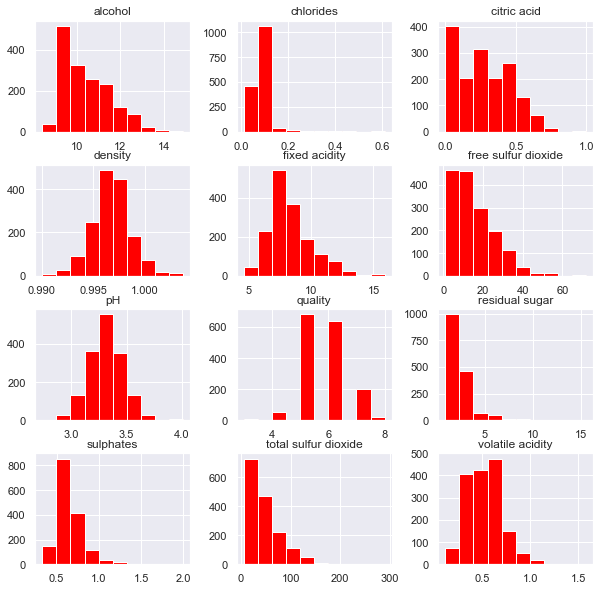

In [8]:
# red wine
sns.set()
data_red.hist(figsize=(10,10), color='red')
plt.show()

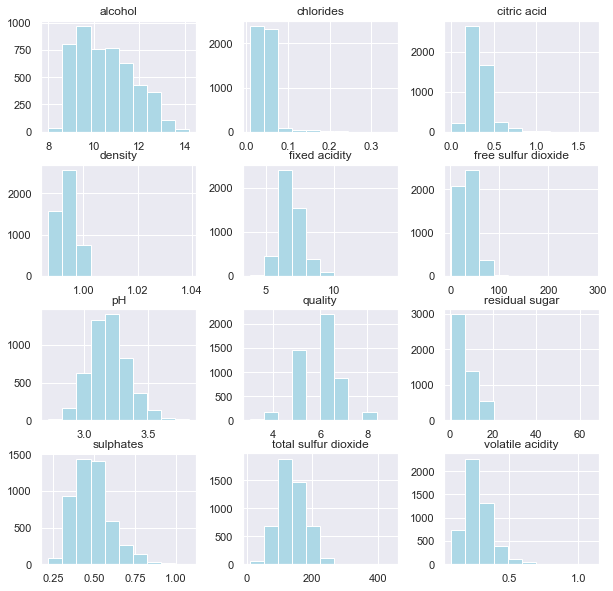

In [9]:
#white wine
sns.set()
data_white.hist(figsize=(10,10), color='lightblue')
plt.show()

Looking at two histograms of every feature we see differences between white and red wines. 

### Correlations

Let's look at the correlation among the features using correlation chart.

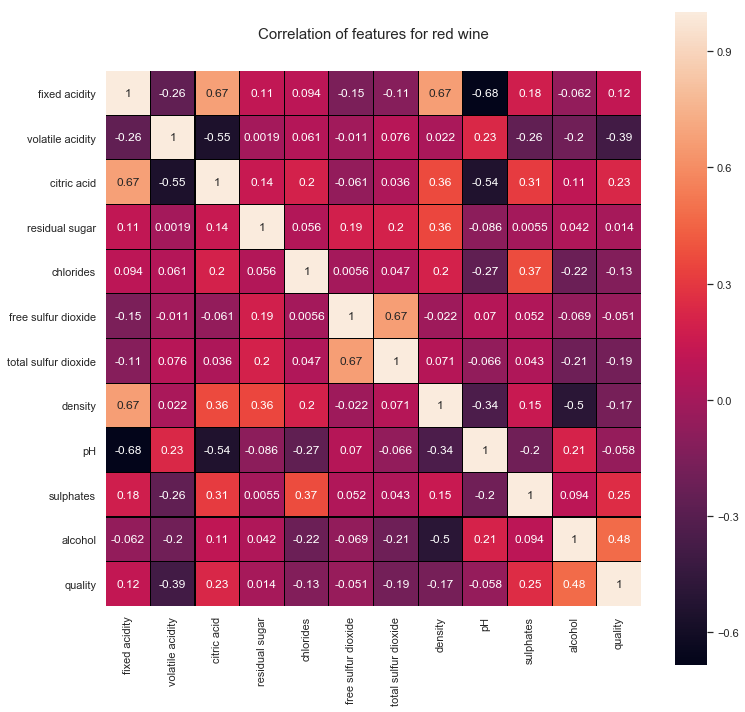

In [14]:
#red wine
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of features for red wine', y=1.05, size=15)
sns.heatmap(data_red.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, 
            linecolor='black', annot=True)

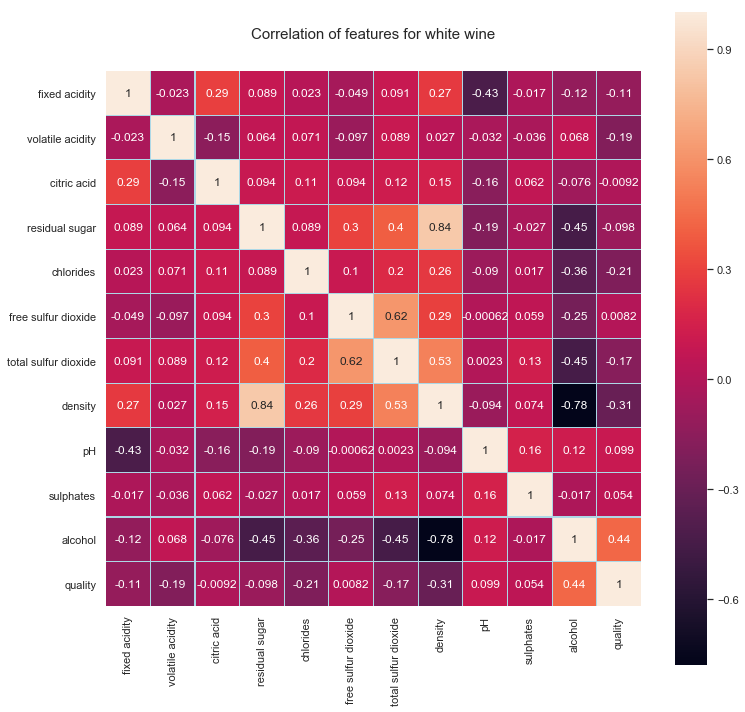

In [25]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of features for white wine', y=1.05, size=15)
sns.heatmap(data_white.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, 
            linecolor='lightblue', annot=True)

Observations: <br>
*Alcohol* has the highest correlation with wine *quality*, next are: various *acidity*, *sulphates*, *density* and *chlorides* for both types of the wine. 

### Grouping wines by quality

Now we will define two groups:first y responds to *quality* and X to the rest of features in datasets.

In [5]:
#Red wine
yr = data_red['quality']
Xr = data_red.drop('quality', axis=1)

In [7]:
#White wine
yw = data_white['quality']
Xw = data_white.drop('quality', axis=1)

Once again we will plot histogram of wine quality distribution for red and white wine:

Text(0,0.5,'count')

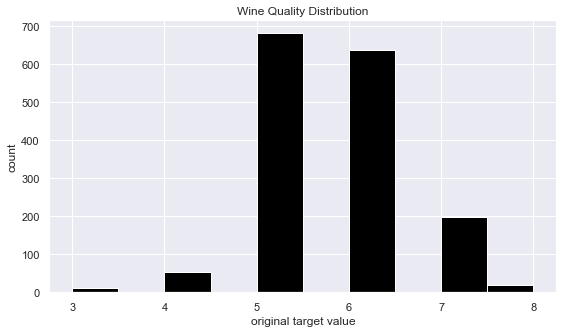

In [36]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.hist(yr, color='black')
plt.title('Wine Quality Distribution')
plt.xlabel('original target value')
plt.ylabel('count')

Text(0,0.5,'count')

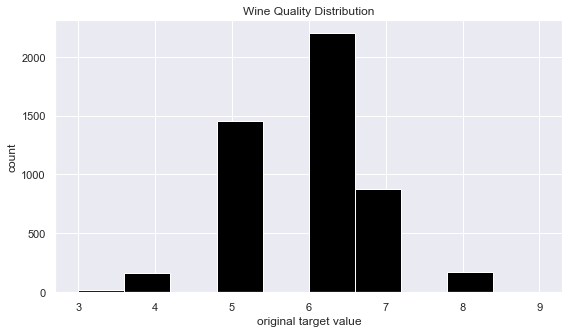

In [40]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.hist(yw, color='black')
plt.title('Wine Quality Distribution')
plt.xlabel('original target value')
plt.ylabel('count')

*Quality* changes from 0 to 10 as integer number. As shown above the most wines has quality of 5 and 6. <br>
In basic statistics we saw that the mean value of this feature for red and white wine is over 5,so lets set two labels: 
 - for wines that *quality > 5* as "good wines": 1, <br>
 - for wines that quality is less or equal to 5 will be "not-so-good wines": 0.

In [6]:
#5 first rows for red wine: 
y1 = (yr > 5).astype(int)
y1.head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int32

The red wine described in a row of index 3 has *quality* greater than 5.

In [8]:
y2 = (yw > 5).astype(int)
y2.head()

0    1
1    1
2    1
3    1
4    1
Name: quality, dtype: int32

Five heading white wines described in dataset are labeled 1.  

**Lets plot histogram to see differences between number of "good wines" and "not-so-good wines":**

Text(0.5,0,'aggregated target value')

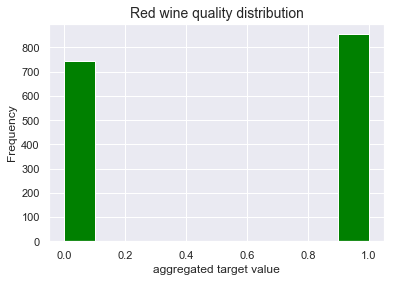

In [12]:
#red wine
ax = y1.plot.hist(color='green')
ax.set_title('Red wine quality distribution', fontsize=14)
ax.set_xlabel('aggregated target value')

Text(0.5,0,'aggregated target value')

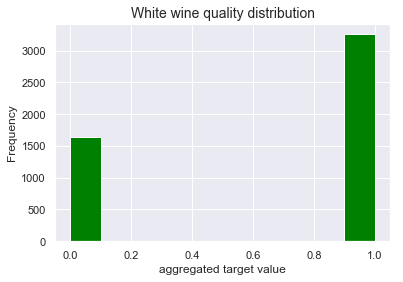

In [41]:
# white wine
ax = y2.plot.hist(color='green')
ax.set_title('White wine quality distribution', fontsize=14)
ax.set_xlabel('aggregated target value')

To see more details about connections of *quality* with other features contained in database, we will use another histograms. <br> We will scale the features to have a better performance.

(-1, 9)

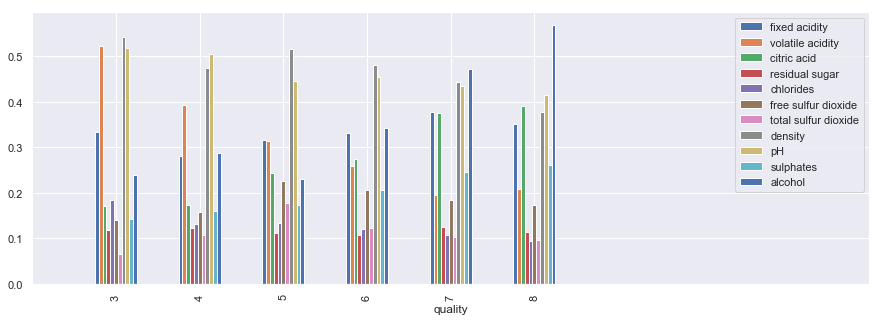

In [18]:
#red ones
cols_to_scale = data_red.columns.tolist()
cols_to_scale.remove('quality')
scaled_wine_df = data_red
scaler = MinMaxScaler()
scaled_wine_df[cols_to_scale] = scaler.fit_transform(scaled_wine_df[cols_to_scale])
scaled_wine_df.groupby('quality').mean().plot(kind='bar', figsize=(15,5))
plt.xlim(-1,9)

(-1, 9)

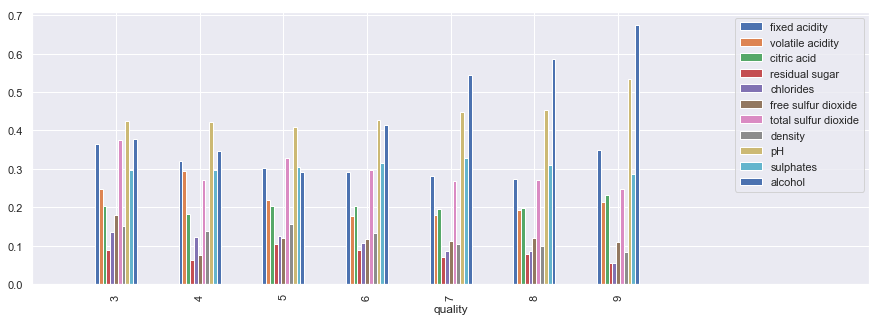

In [19]:
cols_to_scale = data_white.columns.tolist()
cols_to_scale.remove('quality')
scaled_wine_df = data_white
scaler = MinMaxScaler()
scaled_wine_df[cols_to_scale] = scaler.fit_transform(scaled_wine_df[cols_to_scale])
scaled_wine_df.groupby('quality').mean().plot(kind='bar', figsize=(15,5))
plt.xlim(-1,9)

Observations from the plots: <br>
Red wine: *alcohol*, *volatile acidity*, *citric acid*, *chloride*,and *density* are correlated to wine *quality*.<br>
White wine: *alcohol*, *chlorides*, *density* and *pH* are correlated with wine *quality*.

## 3. Binary Classificiation

We will visualize pairplots for variables: *fixed acidity*, *volatile acidity*, and *citric acid*.

In [115]:
def pairplot(cols_keep):
    g = sns.pairplot(data_red,vars=cols_keep,kind='reg',hue='quality')
    return

For this kernel a "good wine" has a *quality* score greater than 5, others are "bad wine".

In [108]:
data_red['quality'] = np.where(data_red['quality']>5,"Good","Bad")

In [114]:
summary = pd.DataFrame(data_red['quality'].describe()).T
summary

,count,unique,top,freq
quality,1599,2,Good,855


E:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


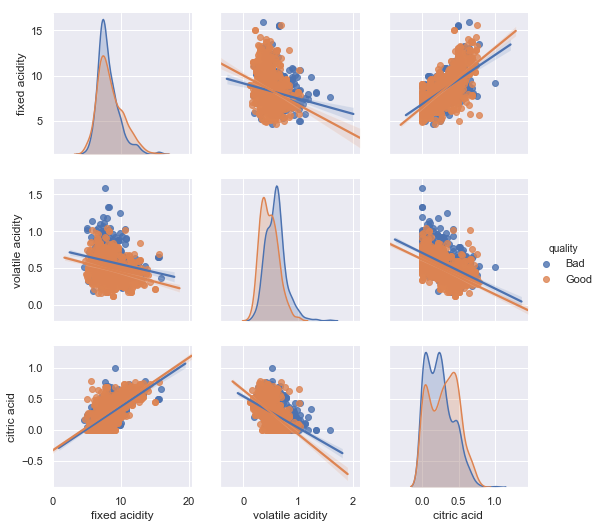

In [113]:
cols_keep = list(data_red.columns[0:3])
pairplot(cols_keep)

In [121]:
#for white wines 
def pairplot(cols_keep):
    g = sns.pairplot(data_white,vars=cols_keep,kind='reg',hue='quality')
    return

In [123]:
summary = pd.DataFrame(data_white['quality'].describe()).T
summary

,count,unique,top,freq
quality,4898,2,Good,3258


E:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


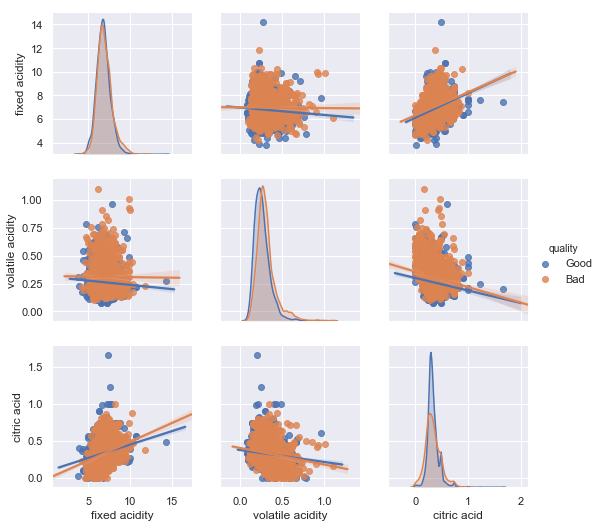

In [124]:
cols_keep = list(data_white.columns[0:3])
pairplot(cols_keep)

## 4. Comparison of algorithms 

Now we are moving to prediction models implemented in SciKit Learn. We would like to see differences of their performances on the databases. <br> We define training and test sets of red and white wine datasets. 

**Logistic Regression** is used to predict the probability of a categorical dependent variable (here if the wine is good or not). The logistic regression model predicts P(Y=1) as a function of X. It requires quite large sample sizes.

**k-NN** models work by taking a data point and looking at the k closest labeled data points. The data point is then assigned the label of the majority of the k closest points.

**SVM** or **Support Vector Machine** is a linear model for classification and regression problems. At first approximation what SVMs do is to find a separating line(or hyperplane) between data of two classes. SVM is an algorithm that takes the data as an input and outputs a line that separates those classes if possible.

**The naive Bayes (NB) classifier**  assigns an observation to the most likely class given some predictor values. The NB classifier predicts that A belongs to class 1, given the observations xₒ as determined by the 50% decision Bondary (P(A = 1 | X = xₒ) > 0.5) . The probability A = 1 is conditioned on xₒ. 

**Decision Trees (DTs)** are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

**Random forests** is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

**The AdaBoost  classifier** is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

**Multi-layer Perceptron (MLP)** is a supervised learning algorithm that learns a function f(⋅): Rm→Ro by training on a dataset, where m is the number of dimensions for input and o  is the number of dimensions for output. Given a set of features X={x1,x2,...,xm} *and a target *y, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers.

In [9]:
#split the data of red wine
seedr = 8 # for reproducibility
Xr_train,Xr_test,yr_train,yr_test = train_test_split(Xr, y1, test_size=0.2, random_state=seedr)

The split sets aside 20% of the data as test set for evaluating the model.

In [10]:
#shape of sets
Xr_train.shape, yr_train.shape, Xr_test.shape, yr_test.shape 

((1279, 11), (1279,), (320, 11), (320,))

In [11]:
#split into training and test data the white wine dataset 
seedw = 8 
Xw_train,Xw_test,yw_train,yw_test = train_test_split(Xw, y2, test_size=0.2, random_state=seedw)

In [12]:
Xw_train.shape, yw_train.shape, Xw_test.shape, yw_test.shape 
#for white ones 

((3918, 11), (3918,), (980, 11), (980,))

#### Models we will use: 
 - Logistic Regression
 - K-Nearest Neighbors
 - Suppor Vector Classifier
 - Naive Bayes Classifier
 - Decision Tree Classifier
 - Random Forest Classifier
 - AdaBoost Classifier
 - Multi-layred Perceptron

In [14]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM_rbf', SVC()))
models.append(('SVM_linear', SVC(kernel='linear')))
models.append(('KNN', KNeighborsClassifier(5) ))
models.append(('GNB', GaussianNB()))
models.append(('ADA', AdaBoostClassifier())),
models.append(('MLP', MLPClassifier(alpha=1)))

In [15]:
# Evaluate each model in turn
train_results_r = []
test_results_r = []
names = []
for name, model in models:
    cv_train_results_r = cross_val_score(model, Xr_train, yr_train, 
                                       cv=10, scoring='accuracy')
    train_results_r.append(cv_train_results_r)
    clf = model.fit(Xr_train, yr_train)
    cv_test_results_r = accuracy_score(yr_test, clf.predict(Xr_test))
    test_results_r.append(cv_test_results_r)
    names.append(name)
    result = "%s: %f (%f) %f" % (name, cv_train_results_r.mean(), cv_train_results_r.std(), 
                                cv_test_results_r)
    print(result)

LR: 0.741102 (0.035258) 0.746875
RF: 0.807640 (0.039996) 0.787500
DT: 0.738862 (0.040291) 0.737500
SVM_rbf: 0.685655 (0.027217) 0.725000
SVM_linear: 0.736384 (0.034732) 0.756250
KNN: 0.647287 (0.033171) 0.612500
GNB: 0.716096 (0.032599) 0.731250
ADA: 0.738088 (0.043417) 0.743750
MLP: 0.676921 (0.045627) 0.725000


This is a population of accuracy measures for each algorithm as each algorithm was evaluated 5 times (*5-fold Cross Validation*).

We will show the algorithms comparison plotted:

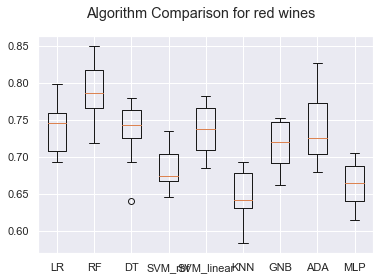

In [57]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison for red wines')
ax = fig.add_subplot(111)
plt.boxplot(train_results_r)
ax.set_xticklabels(names)
plt.show()

At first glimpse we may notice that for the red wine dataset best accuracy is for *Random Forest* and the worst for *KNN*.<br> Let's find out how it will work for bigger dataset - white wine. 

In [52]:
# white wine dataset 
train_results = []
test_results = []
names = []
for name, model in models:
    cv_train_results = cross_val_score(model, Xw_train, yw_train, 
                                       cv=10, scoring='accuracy')
    train_results.append(cv_train_results)
    clf = model.fit(Xw_train, yw_train)
    cv_test_results = accuracy_score(yw_test, clf.predict(Xw_test))
    test_results.append(cv_test_results)
    names.append(name)
    result = "%s: %f (%f) %f" % (name, cv_train_results.mean(), cv_train_results.std(), 
                                cv_test_results)
    print(result)

LR: 0.745810 (0.021043) 0.755102
RF: 0.813172 (0.019366) 0.833673
DT: 0.774878 (0.023879) 0.766327
SVM_rbf: 0.747070 (0.022828) 0.752041
SVM_linear: 0.747334 (0.021305) 0.771429
KNN: 0.691410 (0.021946) 0.693878
GNB: 0.704195 (0.032318) 0.697959
ADA: 0.765453 (0.020640) 0.766327
MLP: 0.692710 (0.020510) 0.704082


Let's create a plot of the model evaluation results and compare the spread and the mean accuracy of each model.

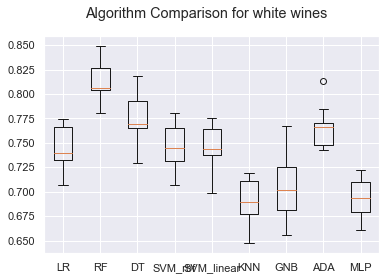

In [59]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison for white wines')
ax = fig.add_subplot(111)
plt.boxplot(train_results)
ax.set_xticklabels(names)
plt.show()

Due to the fact we have similar situation, we will focus on same stuff for white wine dataset as well, nevertheless now let's visualize our computation.

*Random Forest Classifier* has the highest training and test accuracy of about 78% and 83%, followed by *Decision Trees* with training and test accuracy of about 76% and 77%. <br>
Right in this place we may claim that having bigger dataset provides better speculations and predictions. 

## 5. KNN

Even tough *KNN* model led us to the worst performance whole fault is on us. The reason could be the fact that we chose number of neighbours and output might have been very poor.<br> So now we will look for better parameters and find out if it is really the worst method of all.

Firstly, we should notice that the *accuracy* was 0,6125 for red and 0,694 for white wines, which were incredibly bad results, especially in comparison with the others. 

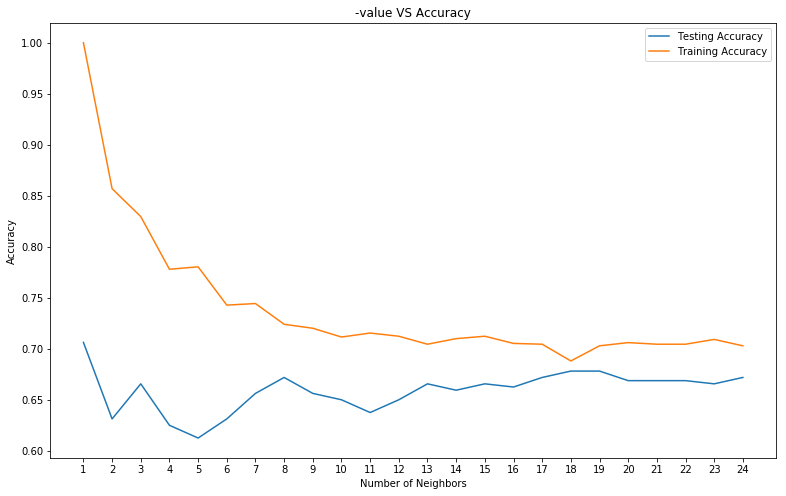

Best accuracy for red wine dataset is 0.70625 with K = 1


In [19]:
# Model complexity for red wine dataset 
neig = np.arange(1, 25)
train_accuracy_r = []
test_accuracy_r = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(Xr_train,yr_train)
    #train accuracy
    train_accuracy_r.append(knn.score(Xr_train, yr_train))
    # test accuracy
    test_accuracy_r.append(knn.score(Xr_test, yr_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy_r, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy_r, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy for red wine dataset is {} with K = {}".format(np.max(test_accuracy_r),1+test_accuracy_r.index(np.max(test_accuracy_r))))

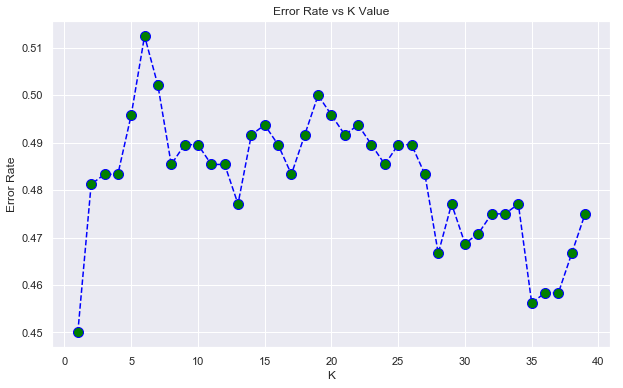

Best accuracy for red wine dataset is 0.55 with K = 1


In [151]:
# Function
error_rate = []

for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(Xr_train, yr_train)
    pred_i = knn.predict(Xr_test)
    error_rate.append(np.mean(pred_i != yr_test))

# Plot error rate
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = '--', marker = 'o', 
        markerfacecolor = 'green', markersize = 10)

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Best accuracy for red wine dataset is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

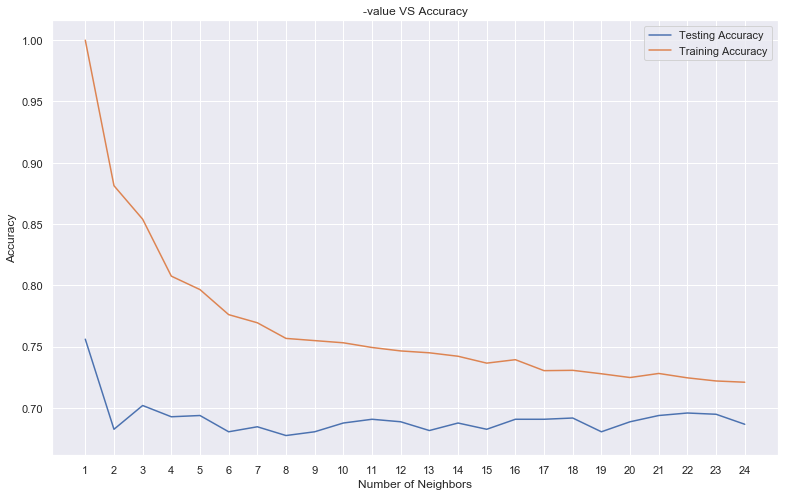

Best accuracy for white wine dataset is 0.7561224489795918 with K = 1


In [143]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(Xw_train,yw_train)
    #train accuracy
    train_accuracy.append(knn.score(Xw_train, yw_train))
    # test accuracy
    test_accuracy.append(knn.score(Xw_test, yw_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph2.png')
plt.show()
print("Best accuracy for white wine dataset is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

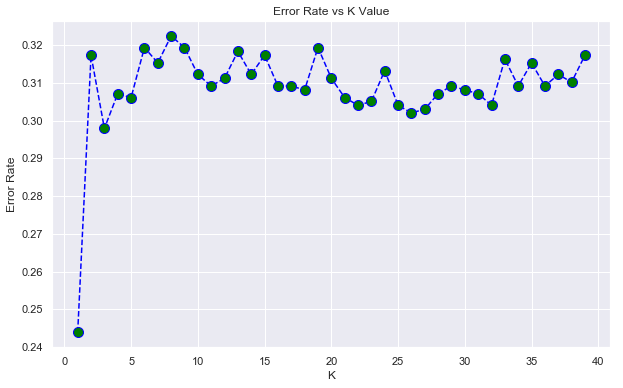

In [152]:
# Function
error_rate = []

for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(Xw_train, yw_train)
    pred_i = knn.predict(Xw_test)
    error_rate.append(np.mean(pred_i != yw_test))

# Plot error rate
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = '--', marker = 'o', 
        markerfacecolor = 'green', markersize = 10)

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

Thus in both situation the best option is to choose only 1 neighbour, which truly improves ours results for white wine datset.

## 6. Random Forest Classifier 

We will use the split of data that was done before. 

### Training and evaluating the Random Forest Classifier with Cross Validation

In [61]:
# Initializing the Random Forest Classifier for red wine
red_RF_clf = RandomForestClassifier(random_state=seedr, n_estimators=100)
red_RF_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=8, verbose=0, warm_start=False)

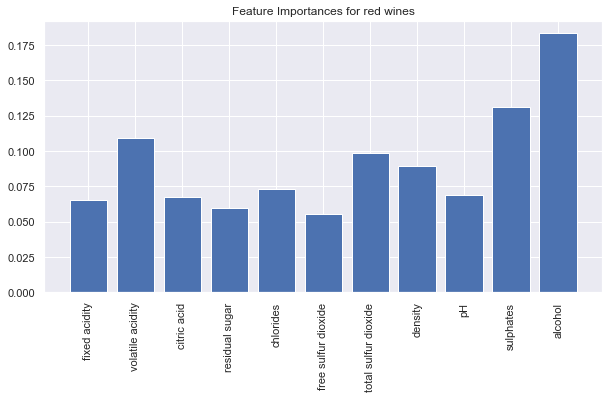

In [99]:
names = list(Xr_train.columns.values)
importances = red_RF_clf.feature_importances_
# Plot the feature importances of the forest
plt.figure(figsize=(10,5))
plt.title("Feature Importances for red wines")
y_pos = np.arange(len(names))
plt.bar(y_pos, importances, align='center')
plt.xticks(y_pos, names, rotation=90)
plt.show()

In [62]:
#for white wine
white_RF_clf = RandomForestClassifier(random_state=seedw, n_estimators=100)
white_RF_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=8, verbose=0, warm_start=False)

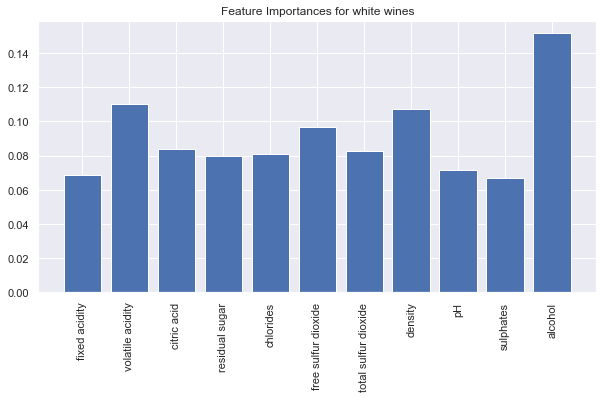

In [101]:
names = list(Xw_train.columns.values)
importances = white_RF_clf.feature_importances_
# Plot the feature importances of the forest
plt.figure(figsize=(10,5))
plt.title("Feature Importances for white wines")
y_pos = np.arange(len(names))
plt.bar(y_pos, importances, align='center')
plt.xticks(y_pos, names, rotation=90)
plt.show()

In [64]:
# Compute k-fold cross validation on training dataset and see mean accuracy score (red wine)
cv_scores = cross_val_score(red_RF_clf,Xr_train, yr_train, cv=10, scoring='accuracy')
print('The accuracy scores for the iterations are {}'.format(cv_scores))
print('The mean accuracy score is {}'.format(cv_scores.mean()))

The accuracy scores for the iterations are [0.82945736 0.82170543 0.82945736 0.828125   0.7890625  0.7734375
 0.79527559 0.84251969 0.78740157 0.81102362]
The mean accuracy score is 0.8107465627479705


In [65]:
# Compute k-fold cross validation on training dataset and see mean accuracy score (white wine)
cv_scores = cross_val_score(white_RF_clf,Xw_train, yw_train, cv=10, scoring='accuracy')
print('The accuracy scores for the iterations are {}'.format(cv_scores))
print('The mean accuracy score is {}'.format(cv_scores.mean()))

The accuracy scores for the iterations are [0.82188295 0.84693878 0.82142857 0.86734694 0.82908163 0.80867347
 0.80102041 0.80818414 0.81074169 0.86445013]
The mean accuracy score is 0.8279748706651595


The mean accuracy score is of course 1.6% better for white wine dataset due to its size. 

### Performing predictions

 Lets see on examples how the Random Forrest Classifier model works:

In [66]:
#red wine
red_RF_clf.fit(Xr_train, yr_train)
red_pred_RF = red_RF_clf.predict(Xr_test)

In [67]:
# Print 5 results to see
for i in range(0,5):
    print('Actual red wine quality is ', yr_test.iloc[i], ' and predicted is ', red_pred_RF[i])

Actual red wine quality is  0  and predicted is  0
Actual red wine quality is  0  and predicted is  0
Actual red wine quality is  1  and predicted is  1
Actual red wine quality is  1  and predicted is  1
Actual red wine quality is  1  and predicted is  1


In [68]:
#white wine
white_RF_clf.fit(Xw_train, yw_train)
white_pred_RF = white_RF_clf.predict(Xw_test)

In [70]:
# Print 5 results to see
for i in range(0,5):
    print('Actual white wine quality is ', yw_test.iloc[i], ' and predicted is ', white_pred_RF[i])

Actual white wine quality is  0  and predicted is  0
Actual white wine quality is  1  and predicted is  1
Actual white wine quality is  0  and predicted is  0
Actual white wine quality is  0  and predicted is  1
Actual white wine quality is  1  and predicted is  1


Our predictions for red dataset for first 5 outputs seems to be perfect, but for white wine we see one missclassificiation out of 5. 

### Accuracy, log loss and confusion matrix

In [74]:
#red wine
print(accuracy_score(yr_test, red_pred_RF))
print(log_loss(yr_test, red_pred_RF))

0.825
6.044345838916635


In [75]:
print(confusion_matrix(yr_test, red_pred_RF))

[[127  24]
 [ 32 137]]


There are 56 missed classifications. 

In [76]:
#white wine
print(accuracy_score(yw_test, white_pred_RF))
print(log_loss(yw_test, white_pred_RF))

0.8408163265306122
5.498090895254171


In [77]:
print(confusion_matrix(yw_test, white_pred_RF))

[[229 100]
 [ 56 595]]


As it comes to white wine there are 156 errors.

### Hyperparameters change

So let's try to improve our performance by choosing some hyperparameters of the Random Forest classifier.
We will use from SciKit-Learn *GridSearchCV* model.

In [96]:
from sklearn.model_selection import GridSearchCV
grid_values = {'n_estimators':[50,100,200],'max_depth':[None,30,15,5],
               'max_features':['auto','sqrt','log2'],'min_samples_leaf':[1,20,50,100]}
red_grid_RF = GridSearchCV(red_RF_clf,cv= 5, param_grid=grid_values,scoring='accuracy')
red_grid_RF.fit(Xr_train, yr_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=8, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 200], 'max_depth': [None, 30, 15, 5], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [1, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [102]:
red_grid_RF.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 100}

Checking the results for tuned parameters:

In [103]:
red_RF_clf = RandomForestClassifier(n_estimators=100,random_state=seedr)
red_RF_clf.fit(Xr_train,yr_train)
red_pred_RF = red_RF_clf.predict(Xr_test)

In [104]:
print(accuracy_score(yr_test,red_pred_RF))
print(log_loss(yr_test,red_pred_RF))

0.825
6.044345838916635


In [105]:
print(confusion_matrix(yr_test,red_pred_RF))

[[127  24]
 [ 32 137]]


The results are the same as earlier for red wine.

Now let's consider white wine dataset:

In [107]:
from sklearn.model_selection import GridSearchCV
grid_values = {'n_estimators':[50,100,200],'max_depth':[None,30,15,5],
               'max_features':['auto','sqrt','log2'],'min_samples_leaf':[1,20,50,100]}
white_grid_RF = GridSearchCV(white_RF_clf,cv= 5, param_grid=grid_values,scoring='accuracy')
white_grid_RF.fit(Xw_train, yw_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=8, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 200], 'max_depth': [None, 30, 15, 5], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [1, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [126]:
white_grid_RF.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [128]:
white_RF_clf = RandomForestClassifier(n_estimators=100,random_state=seed)
white_RF_clf.fit(Xw_train,yw_train)
white_pred_RF = white_RF_clf.predict(Xw_test)

In [130]:
print(accuracy_score(yw_test,white_pred_RF))
print(log_loss(yw_test,white_pred_RF))

0.8408163265306122
5.498090895254171


In [131]:
print(confusion_matrix(yw_test,white_pred_RF))

[[229 100]
 [ 56 595]]


Also here we got the same results. 

## 7. Logistic Regression Classifier

Due to the fact this is the most common model used in classification, we will take a glipse on *Logistic Regression* model. 

Let's fit a *Logistic Regression* model as a classifier.

In [78]:
# Importing and initializing the Logistic Regression model
red_LR_clf = LogisticRegression(random_state=seedr)
red_LR_clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=8, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
white_LR_clf = LogisticRegression(random_state=seedw)
white_LR_clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=8, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Training and evaluating the Logistic Regression Classifier with Cross Validation

In [80]:
# Compute cross validation scores on training dataset and see mean score
cv_scores = cross_val_score(red_LR_clf, Xr_train, yr_train, cv=10, scoring='accuracy')
print('The cv scores from the iterations are {}'.format(cv_scores))
print('The mean cv score is {}'.format(cv_scores.mean()))

The cv scores from the iterations are [0.75968992 0.75193798 0.79844961 0.7578125  0.7265625  0.6953125
 0.7007874  0.69291339 0.74015748 0.78740157]
The mean cv score is 0.7411024861899531


In [81]:
cv_scores = cross_val_score(white_LR_clf, Xw_train, yw_train, cv=10, scoring='accuracy')
print('The cv scores from the iterations are {}'.format(cv_scores))
print('The mean cv score is {}'.format(cv_scores.mean()))

The cv scores from the iterations are [0.7302799  0.76785714 0.72959184 0.7372449  0.74234694 0.70663265
 0.7372449  0.75959079 0.77237852 0.77493606]
The mean cv score is 0.7458103636409757


### Predictions

In [82]:
red_LR_clf.fit(Xr_train, yr_train)
red_pred_LR = red_LR_clf.predict(Xr_test)

In [83]:
# Print 5 results to see
for i in range(0,5):
    print('Actual wine quality is ', yr_test.iloc[i], ' and predicted is ', red_pred_LR[i])

Actual wine quality is  0  and predicted is  0
Actual wine quality is  0  and predicted is  0
Actual wine quality is  1  and predicted is  0
Actual wine quality is  1  and predicted is  0
Actual wine quality is  1  and predicted is  1


Out of the first five predictions, there are two classification errors.

In [92]:
white_LR_clf.fit(Xw_train, yw_train)
white_pred_LR = white_LR_clf.predict(Xw_test)

In [93]:
# Print 5 results to see
for i in range(0,5):
    print('Actual wine quality is ', yw_test.iloc[i], ' and predicted is ', white_pred_LR[i])

Actual wine quality is  0  and predicted is  0
Actual wine quality is  1  and predicted is  1
Actual wine quality is  0  and predicted is  0
Actual wine quality is  0  and predicted is  1
Actual wine quality is  1  and predicted is  1


Classification of white wine here is better becuse only one is missed.

### Accuracy, log loss and confusion matrix for Logistic Regression model 

In [86]:
#red wine
print(accuracy_score(yr_test, red_pred_LR))
print(log_loss(yr_test, red_pred_LR))

0.746875
8.742717729672663


In [87]:
print(confusion_matrix(yr_test, red_pred_LR))

[[115  36]
 [ 45 124]]


There is a total of 81 classification errors.

In [94]:
#white wine
print(accuracy_score(yw_test, white_pred_LR))
print(log_loss(yw_test, white_pred_LR))

0.7551020408163265
8.458621900733233


In [95]:
print(confusion_matrix(yw_test, white_pred_LR))

[[150 179]
 [ 61 590]]


Here we see 240 misclassified labels. 

Comparing the *Logistic Regression classifier* with the *Random Forest classifier*, the first one is a way worse.

## Conclusions 

Comparing the results we conclude that size of dataset matters. <br> The relationships between quality and other features that we have considered in this project are different for red and white wines, so it was good to make models separately for red and white data.<br> During the analyse of database we noticed that the increase of *alcohol* in wine improves its *quality*. <br> The comparison of 8 models implemented in SciKit learn library shows that the Random Forrest Classifier fits  best to our data. The worst one was K-Nearest Neighbors model. <br> We also tried to improve the performance of KNN, and RF  models, and for the first one the results was a way better, but what  was suprising, we got the best result for One-Nearest Neighbor both for red and white wine datasets. In addidtion the change of hyperparameters in Random Forrest classifier gave us the same results that we got at first time.<br> In the last section we wanted to see performance of commonly used Logistic Regression model. Here the desirable output wasn't achived, and it was worse than for RF classifier. 

## The end 